# Data Preprocessing, EDA, and Visualization
This notebook presents data preprocessing, exploration, and analysis of the Endomondo fitness tracking dataset.

The dataset used in this project is sourced from the [FitRec Project](https://sites.google.com/view/fitrec-project/) and comprises
sports records from Endomondo, a fitness-tracking website. It includes sensory data
such as heart rate, speed, and longitude, collected from various users during workouts.

## Table of Contents
1. [Project Overview](#1-project-overview)
2. [Dataset](#2-dataset)
3. [Data Preprocessing](#3-data-preprocessing)
3. [EDA & Data Visualization](#4-eda--data-visualization)

**View this notebook in:**

<a href="https://colab.research.google.com/github/tky1026/nus_it5100f/blob/main/notebook/assignment1.ipynb" target="_blank">
    <img src="https://img.shields.io/badge/Open%20in-Colab-blue?logo=google-colab&style=for-the-badge" alt="Open in Colab"/>
</a>

<a href="https://github.com/tky1026/nus_it5100f" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-Pages-blue?logo=github&style=for-the-badge" alt="GitHub Pages"/>
</a>

<a href="https://github.com/tky1026/nus_it5100f/blob/main/notebook/assignment1.ipynb" target="_blank">
    <img src="https://img.shields.io/badge/View-Notebook-orange?logo=jupyter&style=for-the-badge" alt="View Notebook"/>
</a>

---

## 1 Project Overview
The Endomondo dataset consists of fitness activity records collected from users using the Endomondo application. The dataset includes information about workouts such as activity type, distance, duration, and heart rate, making it useful for analyzing various aspects of user fitness patterns using **Google Colab**.

In this notebook, we will walk through the steps required to download, load, and prepare this dataset for analysis.

### Import Libraries
In this project, we will use the following Python libraries:

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical operations.
- `matplotlib` and `seaborn`: For data visualization.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Dataset

The dataset is available as a large JSON file, and since Colab has limited local storage, you’ll need to store the dataset on Google Drive and access it from there.

**Step-by-Step Instructions:**

1. Download the dataset from the following link: [Endomondo dataset](https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1HLgCkCIBmkso2kGzGDHVTtlLzPBEsh_m%2Fview%3Fusp%3Ddrive_link)
1. Upload the downloaded dataset to Google Drive.
1. Mount your Google Drive in Colab to access the dataset:
1. After mounting, the file will be accessible via the `/content/drive/MyDrive/` directory. Ensure that you store the dataset in a folder that you can access easily, for example:

In [78]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset file
file_path_to_data = "/content/drive/My Drive/IT5100F Project/data/endomondo_proper.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset**

Given that the dataset is quite large, we’ll load it in chunks using pandas to handle memory efficiently. Here's the function to load the dataset in chunks, combining them into a single DataFrame:

In [79]:
def load_data(file_path_to_data, chunksize=1000):
    chunks = []
    with open(file_path_to_data, "r") as file:
        json_reader = pd.read_json(file, orient="records", lines=True, chunksize=chunksize)
        for chunk in json_reader:
            chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

# Load the data
endomondo_df = load_data(file_path_to_data)

# Display DataFrame details
print(f"DataFrame shape (rows, columns): {endomondo_df.shape}")
endomondo_df.head()


DataFrame shape (rows, columns): (21391, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....","[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535.0,"[60.1733487658, 60.1732398011, 60.1729802135, ...","[24.6497704089, 24.650142733, 24.650910683, 24...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877..."
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....","[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038.0,"[60.1732475962, 60.1732096262, 60.1729796268, ...","[24.6498552337, 24.6501554735, 24.6508813463, ...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170..."
2,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....","[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739.0,"[60.1732862368, 60.1732394658, 60.1730676368, ...","[24.6498743445, 24.6502427291, 24.6508224215, ...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206..."
3,"[24.0, 24.0, 24.0, 21.0, 18.6, 17.4, 17.4, 17....","[118, 118, 119, 120, 122, 124, 126, 129, 133, ...",381185226.0,"[60.173279196, 60.1732723229, 60.1732617617, 6...","[24.6498169284, 24.6498684771, 24.6500092093, ...","[7.218, 9.8208, 14.3532, 16.2972, 20.1276, 20....",bike (transport),"[1406647079, 1406647080, 1406647082, 140664708..."
4,"[21.2, 22.0, 22.0, 20.6, 19.8, 19.4, 17.6, 15....","[100, 98, 104, 104, 107, 109, 108, 105, 105, 1...",371302193.0,"[60.1732459199, 60.173199987, 60.1730691455, 6...","[24.650183385200002, 24.6504225209, 24.6508663...","[16.4124, 11.682, 18.162, 21.7728, 24.408, 26....",bike,"[1405100572, 1405100576, 1405100582, 140510059..."


## 3 Data Preprocessing


### 3.1 Data Cleaning

In large datasets like the Endomondo dataset, handling missing or null values is crucial for ensuring the data quality before proceeding with analysis. Here’s how we can address missing values in this dataset:

In [68]:
# Find the total number of missing rows with null values in any column
total_missing = endomondo_df.isnull().any(axis=1).sum()
print(f"Total number of rows with missing values: {total_missing}")
print(f"DataFrame shape before cleaning: {endomondo_df.shape}")

# Remove rows with any null values
endomondo_df_cleaned = endomondo_df.dropna()

# Check again if there are any null values remaining in the dataset
remaining_missing = endomondo_df_cleaned.isnull().any(axis=1).sum()
print(f"---\nRemaining number of rows with missing values: {remaining_missing}")

# Display the cleaned DataFrame shape
print(f"DataFrame shape after cleaning: {endomondo_df_cleaned.shape}")

Total number of rows with missing values: 2000
DataFrame shape before cleaning: (21391, 8)
---
Remaining number of rows with missing values: 0
DataFrame shape after cleaning: (19391, 8)


### 3.2 Data Transformation

- Ensure data consistency

  - Check if the lengths of key columns (such as `altitude`, `latitude`, `longitude`, `timestamp`, `heart_rate`, and `speed`) are consistent for each entry.
  
  - Identify any rows where the lengths of these arrays do not match and inspect them for potential issues.

- Convert timestamps

  - Ensure that timestamps are properly formatted and usable for further time-based analysis.

- Check and remove null values, if any

  - After transformations, verify that there are no missing values left in the dataset.

In [69]:
# Step 1: Ensure Data Consistency across key arrays

# Define the columns that need to have consistent lengths
columns_to_check = ['altitude', 'heart_rate', 'speed', 'latitude', 'longitude', 'timestamp']

# Create a DataFrame of the lengths of the relevant arrays
lengths_df = endomondo_df_cleaned[columns_to_check].apply(lambda col: col.map(len))

# Check for inconsistencies (i.e., rows where not all column lengths are equal)
inconsistent_rows = endomondo_df_cleaned[lengths_df.nunique(axis=1) != 1]

# Print the number of inconsistent rows
print(f"Inconsistent rows found: {len(inconsistent_rows)}")
if len(inconsistent_rows) > 0:
    print(inconsistent_rows.head())

# Step 2: Convert timestamps to datetime format

# Explode the arrays so that each element becomes a row (flatten the arrays)
endomondo_expanded_df = endomondo_df_cleaned.explode([
    "altitude", "latitude", "longitude", "timestamp", "heart_rate", "speed"
])

# Convert timestamps from seconds to datetime
endomondo_expanded_df["timestamp"] = pd.to_datetime(endomondo_expanded_df["timestamp"], unit='s')


# Step 3: Check for any remaining null values after the transformation
total_missing = endomondo_df_cleaned.isnull().any(axis=1).sum()
print(f"Total number of rows with missing values after transformation: {total_missing}")

# If needed, inspect the rows with missing values
if total_missing > 0:
    missing_data_rows = endomondo_df_cleaned[endomondo_df_cleaned.isnull().any(axis=1)]
    print("Rows with missing values:")
    print(missing_data_rows.head())


Inconsistent rows found: 0
Total number of rows with missing values after transformation: 0


In [70]:
# After data consistency and transformation checks, inspect the cleaned dataset
endomondo_expanded_df.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.64977,6.8652,bike,2014-08-24 16:45:46
0,40.6,111,396826535.0,60.17324,24.650143,16.4736,bike,2014-08-24 16:45:54
0,40.6,120,396826535.0,60.17298,24.650911,19.1988,bike,2014-08-24 16:46:05
0,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
0,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


### 3.3 Data Storage

After transforming and cleaning the Endomondo dataset, store the result into a CSV file.

This stored CSV will be used in subsequent notebooks, eliminating the need to reprocess the raw JSON file. The preprocessed data can be quickly loaded for further analysis, model training, or other purposes.

In [71]:
# Save the cleaned and transformed dataset to a new CSV file
file_path_to_csv = f"/content/drive/My Drive/IT5100F Project/data/endomondo_proper_cleaned_expanded.csv"
endomondo_expanded_df.to_csv(file_path_to_csv, index=False)

## 4. EDA & Data Visualization

Before starting any form of modeling or in-depth analysis, it's essential to perform Exploratory Data Analysis (EDA) to better understand the dataset, identify any potential patterns, and detect anomalies. In this part, we will visualize the data and explore key insights.

First, we will load the cleaned and preprocessed CSV file that we saved earlier. This file contains the transformed data, which will now be used for visualizations and further exploration.

In [72]:
# file_path_to_csv = f"/content/drive/My Drive/IT5100F Project/data/endomondo_proper_cleaned_expanded.csv"
endomondo_df = pd.read_csv(file_path_to_csv)

# Check the shape and the first few rows of the loaded dataset
print(f"DataFrame shape: {endomondo_df.shape}")
endomondo_df.head()

DataFrame shape: (9695500, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


### 4.1 Unique Sports Analysis

Calculate the number of unique sports present in the dataset.

In [73]:
# (Optional) Clean the 'sport' column to ensure consistency
endomondo_df['sport'] = endomondo_df['sport'].str.lower().str.strip()

unique_sports = endomondo_df['sport'].unique()  # Get the unique sports
num_unique_sports = len(unique_sports)          # Count the number of unique sports

# Display the results
print(f"Total number of unique sports: {num_unique_sports}")
print("List of unique sports:")
print(*unique_sports, sep=', ')

Total number of unique sports: 14
List of unique sports:
bike, bike (transport), run, kayaking, indoor cycling, mountain bike, orienteering, core stability training, walk, cross-country skiing, fitness walking, roller skiing, skate, hiking


### 4.2 Bar Chart of Workouts by Sport

Create a bar chart to visualize the distribution of workouts across different sports. This helps us understand which sports are the most popular in the dataset and how the activities are distributed.

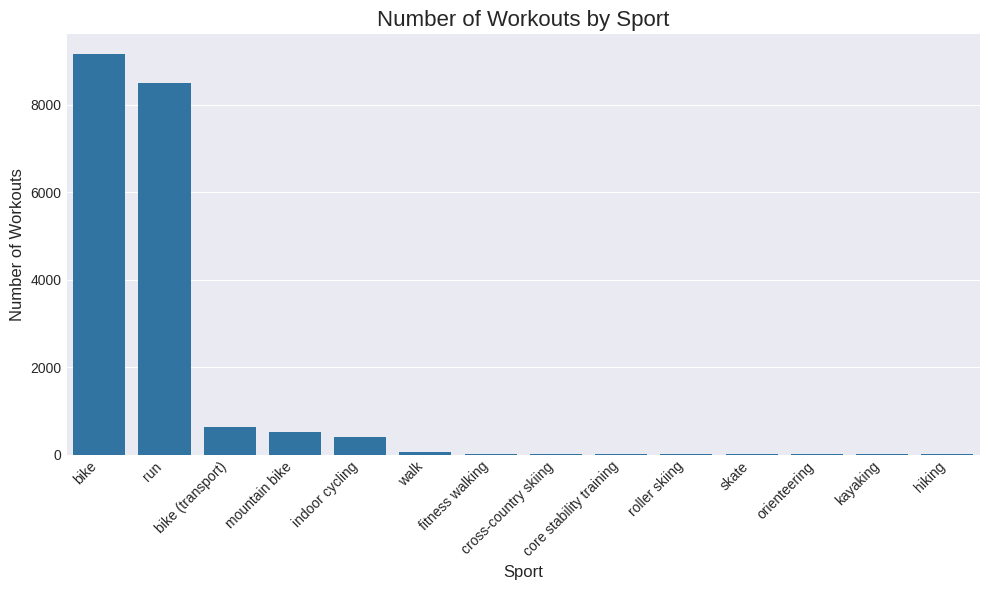

In [74]:
# Step 1: Count the number of workouts for each sport
sport_counts = endomondo_df[["id", "sport"]].drop_duplicates()
sport_counts = sport_counts['sport'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x=sport_counts.index, y=sport_counts.values)

# Step 3: Customize the plot
plt.title('Number of Workouts by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Workouts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

### 4.3 Heatmap Visualization

In this section, we will visualize geographical workout data for a specific user (`user_id = 9633831`) using heatmaps. A heatmap is a great way to understand spatial data by representing it with color gradients.

We will plot two heatmaps for the user:

1. Heatmap 1: Visualize the altitude based on latitude and longitude.
1. Heatmap 2: Visualize the heart rate based on latitude and longitude.


In [75]:
# Filter the data for the specific user_id
user_id = 9633831
user_data = endomondo_expanded_df[endomondo_expanded_df['id'] == user_id]

# Sort the data by timestamp to ensure we correctly identify start and end points
user_data = user_data.sort_values(by='timestamp')

# Get the start and end points
start_point = user_data.iloc[0]  # First row is the start
end_point = user_data.iloc[-1]   # Last row is the end

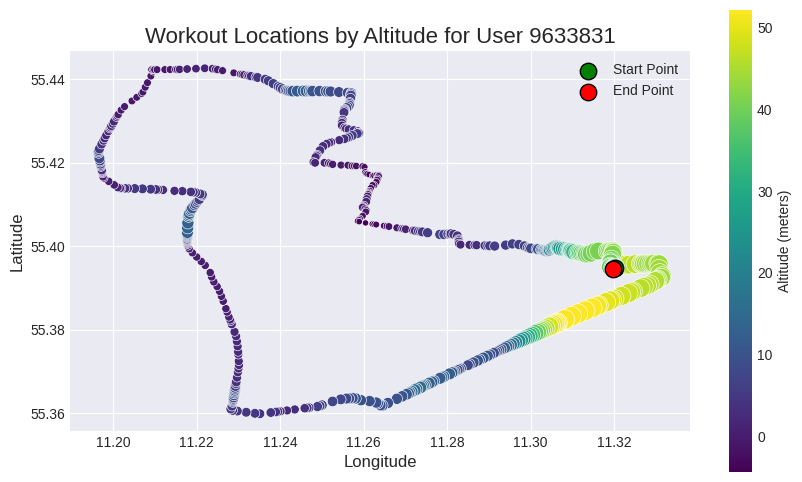

In [76]:
# Heatmap 1 - Longitude (X), Latitude (Y), Altitude (Hue)
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
scatter = sns.scatterplot(
    ax=ax,
    data=user_data,
    x='longitude',
    y='latitude',
    hue='altitude',
    size='altitude',
    sizes=(20, 200),
    palette='viridis',
    # edgecolor=None,
    legend=False
)

# Set color bar and correct its range and direction
norm = plt.Normalize(user_data['altitude'].min(), user_data['altitude'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Explicitly assign the color bar to the correct axis
cbar = fig.colorbar(sm, ax=ax, label="Altitude (meters)")

# Highlight the start point in green
ax.scatter(
    start_point['longitude'],
    start_point['latitude'],
    color='green',
    label='Start Point',
    s=140,
    edgecolor='black'
)

# Highlight the end point in red
ax.scatter(
    end_point['longitude'],
    end_point['latitude'],
    color='red',
    label='End Point',
    s=140,
    edgecolor='black'
)

# Set plot title and labels
ax.set_title(f'Workout Locations by Altitude for User {user_id}', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Ensure equal aspect ratio for latitude and longitude (square grid)
ax.set_aspect('equal', adjustable='box')

# Add legend
ax.legend()

# Show the plot
plt.show()

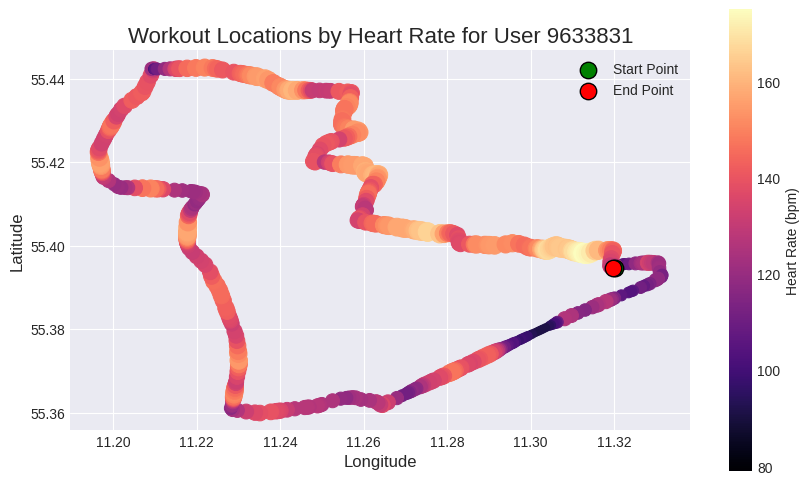

In [77]:
# Heatmap 2 - Longitude (X), Latitude (Y), Heart Rate (Hue)
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot for heart rate
scatter = sns.scatterplot(
    ax=ax,
    data=user_data,
    x='longitude',
    y='latitude',
    hue='heart_rate',  # Use heart rate for hue
    size='heart_rate',  # Also map heart rate to the size of the points
    sizes=(10, 200),
    palette='magma',  # Use a different color palette for heart rate
    edgecolor=None,
    legend=False
)

# Set color bar for heart rate
norm = plt.Normalize(user_data['heart_rate'].min(), user_data['heart_rate'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])

# Explicitly assign the color bar to the correct axis
cbar = fig.colorbar(sm, ax=ax, label="Heart Rate (bpm)")

# Highlight the start point in green
ax.scatter(
    start_point['longitude'],
    start_point['latitude'],
    color='green',
    label='Start Point',
    s=140,
    edgecolor='black'
)

# Highlight the end point in red
ax.scatter(
    end_point['longitude'],
    end_point['latitude'],
    color='red',
    label='End Point',
    s=140,
    edgecolor='black'
)

# Set plot title and labels
ax.set_title(f'Workout Locations by Heart Rate for User {user_id}', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Ensure equal aspect ratio for latitude and longitude (square grid)
ax.set_aspect('equal', adjustable='box')

# Add legend
ax.legend()

# Show the plot
plt.show()
